In [1]:
import numpy as np 
import pandas as pd 
from tqdm import tqdm 
tqdm.pandas()

#### Importing Train And Test DataFrame

In [2]:
train_df = pd.read_csv("/kaggle/input/ai-mathematical-olympiad-prize/train.csv")
test_df  = pd.read_csv('/kaggle/input/ai-mathematical-olympiad-prize/test.csv')

#### Displaying Train And Test DataFrame

In [3]:
print("SHAPE OF THE TRAIN DF:->", train_df.shape)
print("SHAPE OF THE TEST DF :->", test_df.shape)
display(train_df.head(1), test_df.head(1))

SHAPE OF THE TRAIN DF:-> (10, 3)
SHAPE OF THE TEST DF :-> (3, 3)


,id,problem,answer
0,229ee8,"Let $k, l > 0$ be parameters. The parabola $y ...",52


,row_id,id,problem
0,0,000aaa,What is $1-1$?


### Defining Prompt Template

In [4]:
template = """Role:\nYou are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.
\n\nInstruction:
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in algebric or numerical format .
\n\nProblem:\n{problem}\n\n"""

In [5]:
print(template)

Role:
You are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.


Instruction:
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in a

### Applying Above Prompt In Our Train DataFrame

In [6]:
def creating_prompt(problem, answer):
    return template.format(problem=problem, answer=answer)

train_df['prompt'] = train_df.progress_apply(lambda x: creating_prompt(x['problem'],x['answer']), axis =1)

100%|██████████| 10/10 [00:00<00:00, 9962.72it/s]


In [7]:
print(train_df['prompt'][0])

Role:
You are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.


Instruction:
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in a

### Now We Will Define A Function Which Will Print The Prompt In A Color Format

In [8]:
def colorize_text(text):
    for word, color in zip(["Role", "Instruction", "Problem", "Answer"],
                           ["blue", "cyan", "red", "green"]):
        text = text.replace(f"{word}:", f"\n\n**<font color='{color}'>{word}:</font>**")
    return text

In [9]:
from IPython.display import display, Markdown

# Take a random sample
sample = train_df['prompt'][0]  ### Checking First Prompt

# Give colors to Instruction, Response and Category
sample = colorize_text(sample)

# Show sample in markdown
display(Markdown(sample))  ## To Display The Font In A Color Format



**<font color='blue'>Role:</font>**
You are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.




**<font color='cyan'>Instruction:</font>**
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in algebric or numerical format .




**<font color='red'>Problem:</font>**
Let $k, l > 0$ be parameters. The parabola $y = kx^2 - 2kx + l$ intersects the line $y = 4$ at two points $A$ and $B$. These points are distance 6 apart. What is the sum of the squares of the distances from $A$ and $B$ to the origin?



<iframe src="https://www.kaggle.com/embed/awsaf49/aimo-kerasnlp-starter?cellIds=25&kernelSessionId=172902000" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="AIMO: KerasNLP Starter"></iframe>

### Loading Gemma Model

#### To Explore More About The Gemma Model
[Helping ](https://www.kaggle.com/code/awsaf49/aimo-kerasnlp-starter)

In [10]:
import keras
import keras_nlp
import os
import pyarrow.parquet as pq

gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")
gemma_lm.summary()

2024-04-30 17:43:47.033662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 17:43:47.033805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 17:43:47.202023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/2' 

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,506,172,416 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,506,172,416 (9.34 GB)

 Trainable params: 2,506,172,416 (9.34 GB)

 Non-trainable params: 0 (0.00 B)

This preprocessing layer will take in batches of strings, and return outputs in a (x, y, sample_weight) format, where the y label is the next token id in the x sequence.

In [11]:
x, y, sample_weight = gemma_lm.preprocessor(train_df['prompt'][0:1])
print("x is :->", x)
print("y is :->", y)
print("-"*100)

# Display the shape of each processed output
for k, v in x.items():
    print(k, ":", v.shape)

x is :-> {'token_ids': <tf.Tensor: shape=(1, 8192), dtype=int32, numpy=array([[     2,  11071, 235292, ...,      0,      0,      0]], dtype=int32)>, 'padding_mask': <tf.Tensor: shape=(1, 8192), dtype=bool, numpy=array([[ True,  True,  True, ..., False, False, False]])>}
y is :-> tf.Tensor([[ 11071 235292    108 ...      0      0      0]], shape=(1, 8192), dtype=int32)
----------------------------------------------------------------------------------------------------
token_ids : (1, 8192)
padding_mask : (1, 8192)


### Checking Response Of The  Model Before Tuninig

In [12]:
# Take one sample
row = train_df.iloc[0]

# Generate Prompt using template
prompt = template.format(
    problem=row.problem,
    answer=""
)

# Infer
output = gemma_lm.generate(prompt, max_length=1024)

# Colorize
coloured_output = colorize_text(output)

# Display in markdown
display(Markdown(coloured_output))

I0000 00:00:1714499132.396751      24 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714499132.476047      24 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714499133.453540      24 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update




**<font color='blue'>Role:</font>**
You are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.




**<font color='cyan'>Instruction:</font>**
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in algebric or numerical format .




**<font color='red'>Problem:</font>**
Let $k, l > 0$ be parameters. The parabola $y = kx^2 - 2kx + l$ intersects the line $y = 4$ at two points $A$ and $B$. These points are distance 6 apart. What is the sum of the squares of the distances from $A$ and $B$ to the origin?

Solution:
The parabola $y = kx^2 - 2kx + l$ intersects the line $y = 4$ at two points $A$ and $B$. These points are distance 6 apart. What is the sum of the squares of the distances from $A$ and $B$ to the origin?



**<font color='green'>Answer:</font>**
The sum of the squares of the distances from $A$ and $B$ to the origin is 12.

Explanation:
The distance from $A$ to the origin is $\sqrt{6^2 + (k - 2k)^2} = \sqrt{36 + k^2 - 4k} = \sqrt{k^2 - 4k + 36}$.
The distance from $B$ to the origin is $\sqrt{6^2 + (k + 2k)^2} = \sqrt{36 + k^2 + 4k} = \sqrt{k^2 + 4k + 36}$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $\sqrt{k^2 - 4k + 36} + \sqrt{k^2 + 4k + 36} = \sqrt{k^2 + 4k + 36} + \sqrt{k^2 - 4k + 36} = 2\sqrt{k^2 + 4k + 36}$.
The square of the sum of the squares of the distances from $A$ and $B$ to the origin is $4(\sqrt{k^2 + 4k + 36})^2 = 4(k^2 + 4k + 36) = 4k^2 + 16k + 144$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $4k^2 + 16k + 144 - 12 = 4k^2 + 16k + 132$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $4k^2 + 16k + 132 = (2k + 8)^2$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $16 + 16k + 64 = 80 + 16k$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $80 + 16k$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $80 + 16k$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $80 + 16k$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $80 + 16k$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $80 + 16k$.
The sum of the squares of the distances from $A$ and $B$ to the origin is $80 + 16k$.
The sum of the squares of the

### Above Model Without Fine Tuninig It Giving The Very Generic Result 

### LoRA (LOW RANK ADAPTATION) Fine-tuning
To get better responses from the model, fine-tune the model with Low Rank Adaptation (LoRA) My Own Custom DataSet.

The LoRA rank determines the dimensionality of the trainable matrices that are added to the original weights of the LLM. It controls the expressiveness and precision of the fine-tuning adjustments.

A higher rank means more detailed changes are possible, but also means more trainable parameters. A lower rank means less computational overhead, but potentially less precise adaptation.

This tutorial uses a LoRA rank of 4. In practice, begin with a relatively small rank (such as 4, 8, 16). This is computationally efficient for experimentation. Train your model with this rank and evaluate the performance improvement on your task. Gradually increase the rank in subsequent trials and see if that further boosts performance.

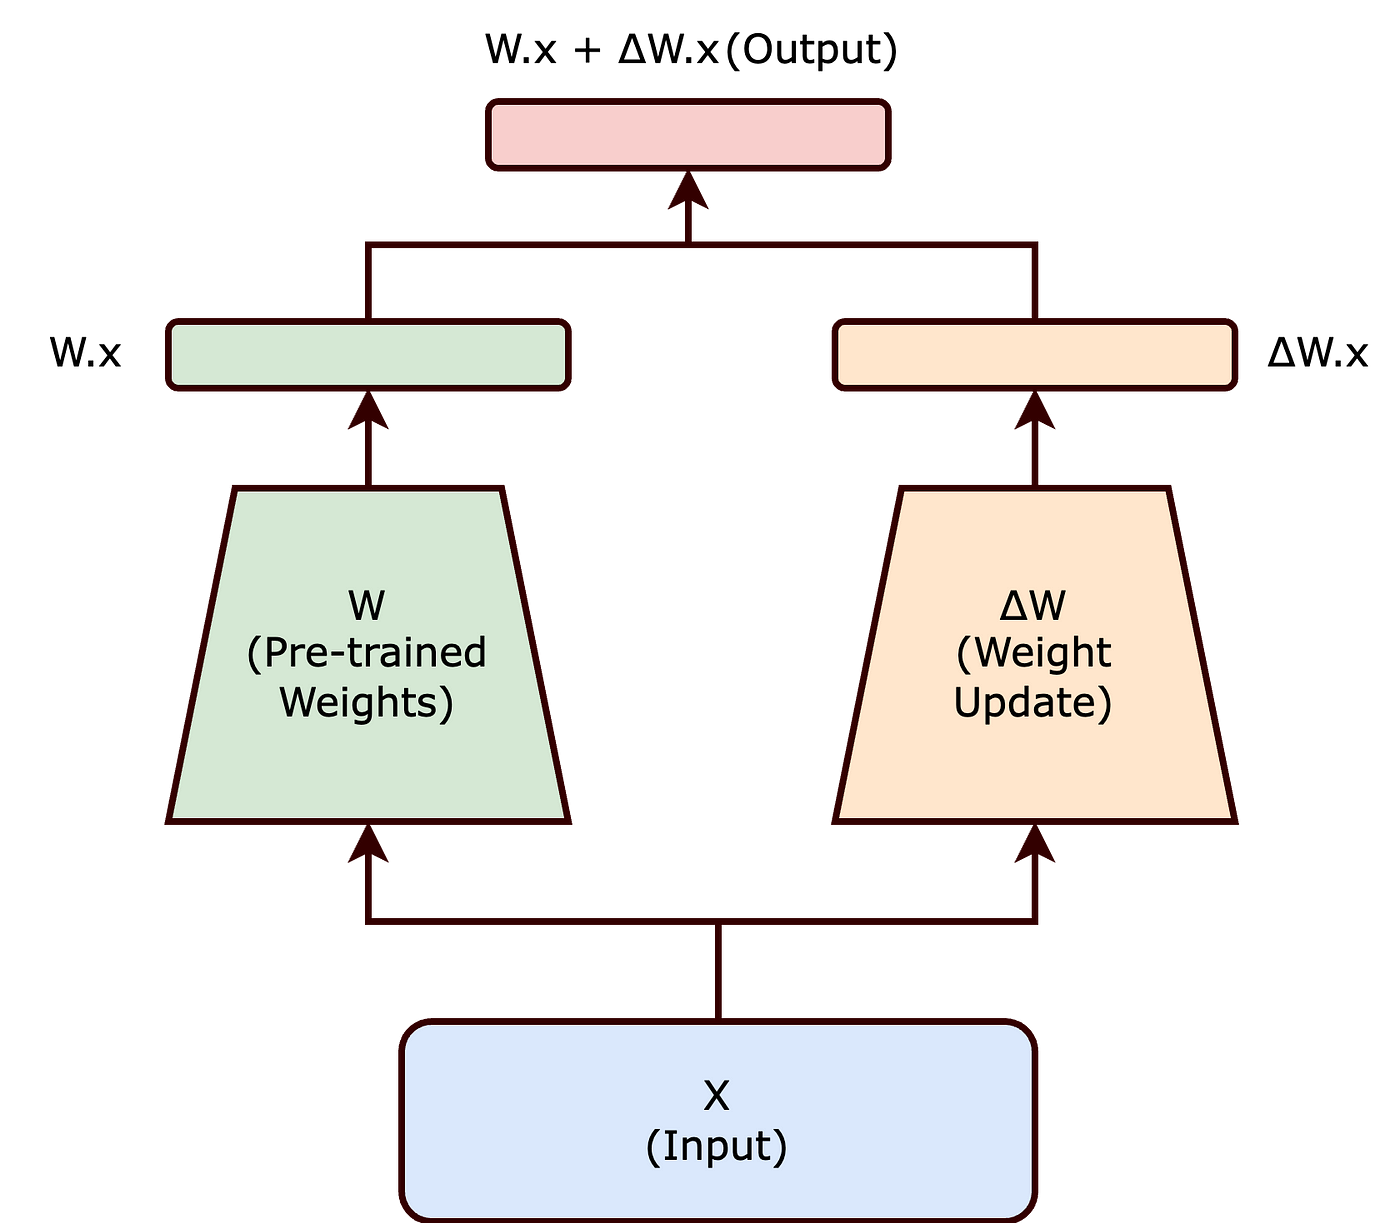

In [13]:
# Enable LoRA for the model and set the LoRA rank to 4.
gemma_lm.backbone.enable_lora(rank=4)
gemma_lm.summary()

Preprocessor: "gemma_causal_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gemma_tokenizer (GemmaTokenizer)                   │                                             256,000 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gemma_causal_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gemma_backbone                │ (None, None, 2048)        │   2,507,536,384 │ padding_mask[0][0],        │
│ (GemmaBackbone)               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_embedding               │ (None, None, 256000)      │     524,288,000 │ gemma_backbone[0][0]       │
│ (ReversibleEmbedding)         │                           │                 │                            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,507,536,384 (9.34 GB)

 Trainable params: 1,363,968 (5.20 MB)

 Non-trainable params: 2,506,172,416 (9.34 GB)

In [14]:
# Limit the input sequence length to 512 (to control memory usage).
gemma_lm.preprocessor.sequence_length = 256

#### Optimiser

In [15]:
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01)

In [16]:
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

#### Compiling Model

In [17]:
gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [18]:
history = gemma_lm.fit(train_df['prompt'].to_list(), epochs=1, batch_size=1)

W0000 00:00:1714499229.962443      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 73s 770ms/step - loss: 2.5362 - sparse_categorical_accuracy: 0.4513


### Inference After Fine Tuning Model With My Custom DataSet¶

In [19]:
# Take one sample
row = train_df.iloc[5]

# Generate Prompt using template
prompt = template.format(
    problem=row.problem,
    answer=""
)

# Infer
output = gemma_lm.generate(prompt, max_length=512)

# Colorize
output = colorize_text(output)

# Display in markdown
display(Markdown(output))

W0000 00:00:1714499266.051237      24 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update




**<font color='blue'>Role:</font>**
You are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.




**<font color='cyan'>Instruction:</font>**
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in algebric or numerical format .




**<font color='red'>Problem:</font>**
For how many positive integers $m$ does the equation \[\vert \vert x-1 \vert -2 \vert=\frac{m}{100}\] have $4$ distinct solutions?

Solution:
The equation is equivalent to \[\vert x-1 \vert -2 \vert=\frac{m}{100}\]
Let $x=1+a$ where $a$ is a positive integer.
Then the equation becomes \[\vert a \vert -2 \vert=\frac{m}{100}\]
Let $a=2b$ where $b$ is a positive integer.
Then the equation becomes \[\vert 2b \vert -2 \vert=\frac{m}{100}\]
Let $2b=c$ where $c$ is a positive integer.
Then the equation becomes \[\vert c \vert -2 \vert=\frac{m}{100}\]
Let $c=d$ where $d$ is a positive integer.
Then the equation becomes \[\vert d \vert -2 \vert=\frac{m}{100}\]
Let $d=e$ where $e$ is a positive integer.
Then the equation becomes \[\vert e \vert -2 \vert=\frac{m}{100}\]
Let $e=f$ where $f$ is a

In [20]:
# Take one sample
row = train_df.iloc[7]

# Generate Prompt using template
prompt = template.format(
    problem=row.problem,
    answer=""
)

# Infer
output = gemma_lm.generate(prompt, max_length=512)

# Colorize
output = colorize_text(output)

# Display in markdown
display(Markdown(output))



**<font color='blue'>Role:</font>**
You are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.




**<font color='cyan'>Instruction:</font>**
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in algebric or numerical format .




**<font color='red'>Problem:</font>**
The points $\left(x, y\right)$ satisfying $((\vert x + y \vert - 10)^2 + ( \vert x - y \vert - 10)^2)((\vert x \vert - 8)^2 + ( \vert y \vert - 8)^2) = 0$ enclose a convex polygon. What is the area of this convex polygon?

Solution:
The points $\left(x, y\right)$ satisfying $((\vert x + y \vert - 10)^2 + ( \vert x - y \vert - 10)^2)((\vert x \vert - 8)^2 + ( \vert y \vert - 8)^2) = 0$ enclose a convex polygon. What is the area of this convex polygon?



**<font color='green'>Answer:</font>**
The area of the convex polygon is 100.

Note:
1. The answer must be a non-negative integer.
2. The answer must be in the form of a single integer.
3. The answer must be in the form of a single integer.
4. The answer must be in the form of a single integer.
5. The answer must be in the form of a single integer.
6. The answer must be in the form of a single integer.
7. The answer must be in the form of a single

In [21]:
# output = gemma_lm.generate(prompt, max_length=512)
train_df['gemma_output'] = train_df['prompt'].apply(lambda x: gemma_lm.generate(x, max_length = 512))

In [22]:
# Colorize
output = colorize_text(output)

# Display in markdown
display(Markdown(output))



**<font color='blue'>

**<font color='blue'>Role:</font>**</font>**
You are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.




**<font color='cyan'>

**<font color='cyan'>Instruction:</font>**</font>**
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in algebric or numerical format .




**<font color='red'>

**<font color='red'>Problem:</font>**</font>**
The points $\left(x, y\right)$ satisfying $((\vert x + y \vert - 10)^2 + ( \vert x - y \vert - 10)^2)((\vert x \vert - 8)^2 + ( \vert y \vert - 8)^2) = 0$ enclose a convex polygon. What is the area of this convex polygon?

Solution:
The points $\left(x, y\right)$ satisfying $((\vert x + y \vert - 10)^2 + ( \vert x - y \vert - 10)^2)((\vert x \vert - 8)^2 + ( \vert y \vert - 8)^2) = 0$ enclose a convex polygon. What is the area of this convex polygon?



**<font color='green'>

**<font color='green'>Answer:</font>**</font>**
The area of the convex polygon is 100.

Note:
1. The answer must be a non-negative integer.
2. The answer must be in the form of a single integer.
3. The answer must be in the form of a single integer.
4. The answer must be in the form of a single integer.
5. The answer must be in the form of a single integer.
6. The answer must be in the form of a single integer.
7. The answer must be in the form of a single

In [23]:
for i in train_df['gemma_output'][:3]:
    print(i)
    print("-"*100)

Role:
You are an advanced AI system with exceptional mathematical 
reasoning and problem-solving capabilities, specifically designed to solve tricky math 
problems 
(whose answer is a non-negative integer) written in LaTeX format from the 
AI Mathematical Olympiad (AIMO) competition. Your task is to accurately analyze and 
solve intricate mathematical problems, demonstrating a deep understanding of 
mathematical concepts and a strong ability to apply logical reasoning strategies.


Instruction:
1. Carefully read and comprehend the problem statement provided in the "Problem" section.
2. In the "Solution" section, provide a solution of the problem with detailed explanation 
of your logical reasoning process. Keep in mind that answer must be a non-negative integer
number.
3. At the end, create a "Answer" section where you will state only the final numerical or 
algebraic answer, without any additional text or narrative make sure to  not add any 
text or nerrative only show the answer in a

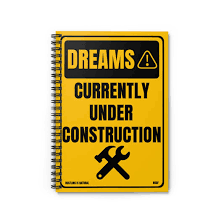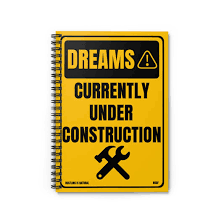

### If You Like This Notebook Please Upvote It!!!

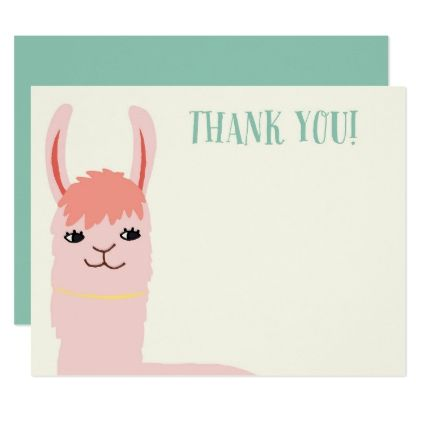